In [2]:
import numpy as np
import pandas as pd

from pytil.object import Namespace as O
from pytil.utility import *
#from helpers import *

import random, math, functools, itertools, os

ss = slice(None)

In [2]:
df = pd.read_hdf('../data/train.hdf5')
dg = pd.read_hdf('../data/test.hdf5')
dh = pd.concat([df, dg])
dh['Index'] = dh.index
dh['Count'] = 1
dh['wy'] = dh.Weight * dh.y
df, dg = dh.loc[:-1], dh.loc[0:]

In [3]:
N_TRAIN, N_TEST = 623817, 640430
n_stock = len(set(dh.Stock))

In [4]:
xfeats = 'x0 x1 x2 x3A x3B x3C x3D x3E x4 x5 x6'.split()
idfeats = 'Market Stock'.split()

In [13]:
import matplotlib.pyplot as plt
#import seaborn as sns
#import altair as alt
#from altair import *
#sns.set()
plt.style.use(['classic', 'seaborn', 'seaborn-colorblind'])
from pytil.quickvis import canvas
%matplotlib notebook
canvas(12, 9) #(16, 12)

# Matrix Factorization

In [6]:
from wpca import PCA, WPCA, EMPCA
from sklearn.decomposition import PCA as skPCA, FastICA

In [96]:
def center(matrix):
    assert not np.isnan(matrix).any().any()
    #l, r = matrix.shape
    #left = np.eye(l) - 1 / l * np.ones([l, l])
    #right = np.eye(r) - 1 / r * np.ones([r, r])
    #ret = left @ matrix @ right
    #return matrix * 0 + ret
    demean = lambda x: x - x.mean()
    return matrix.pipe(demean).T.pipe(demean).T

In [ ]:
raise Exception("don't run! walk")

/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


<IPython.core.display.Javascript object>


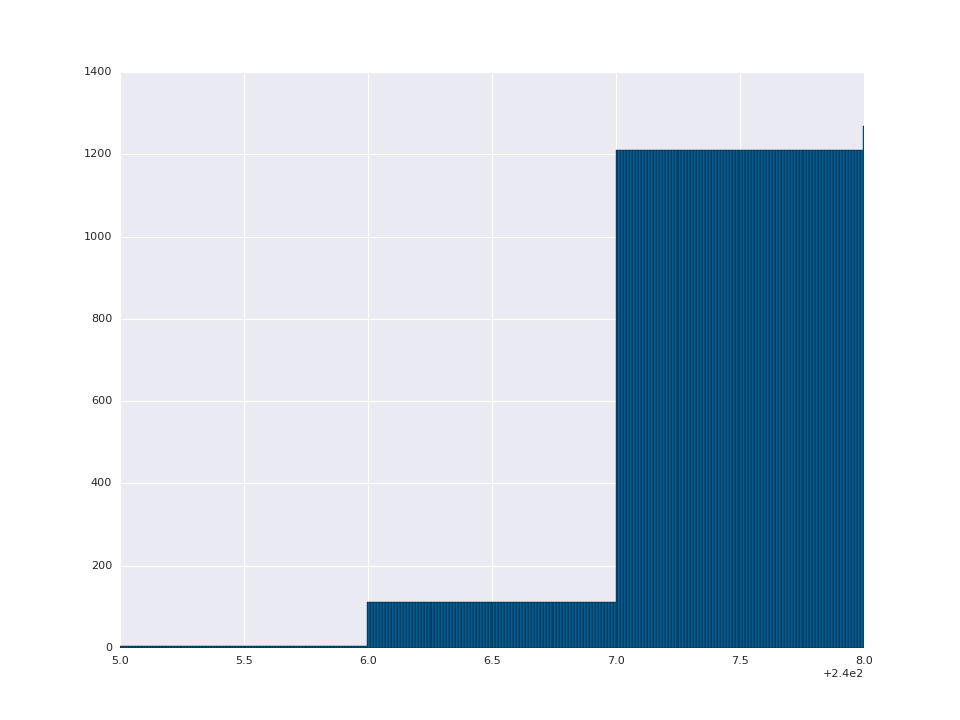

cut off at at least 246 days of valid data


In [18]:
from common import *
thing = (~df.pivot('Day', 'Stock', 'y').T[stockmarket == 3].T.isna()).sum()
h = thing[thing >= 245].hist(bins=500, cumulative=True)
print("cut off at at least 246 days of valid data")

<IPython.core.display.Javascript object>


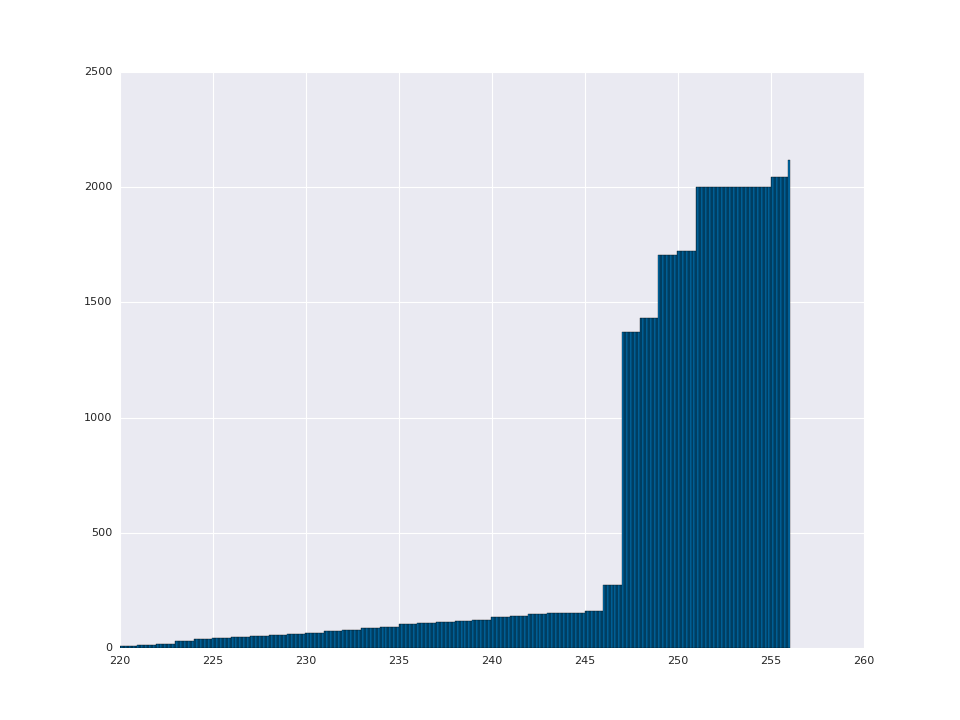

cut off at at least 246 days of valid data


In [240]:
# Just info!
thing = (~df.pivot('Day', 'Stock', 'y').isna()).sum()
h = thing[thing >= 220].hist(bins=500, cumulative=True)
print("cut off at at least 246 days of valid data")

In [272]:
data = df.groupby('Stock').filter(lambda x: (~x.y.isna()).sum() >= 246)
market = data.groupby('Stock').Market.nth(0)

In [268]:
Y = data.pivot('Day', 'Stock', 'y')
W = data.pivot('Day', 'Stock', 'Weight')
ywmean = (Y * W).sum() / W.sum()
ywstd = (W * (Y - ywmean) ** 2).sum() / (W.sum() - W.mean())
Ywnorm = (Y - ywmean) / ywstd

In [259]:
thestocks = set(data.Stock)
print(len(thestocks))

1957


In [188]:
(~Y.T.isna()).sum().value_counts()

1957    181
1956     41
1955     11
1690      4
426       4
1653      3
693       2
1954      2
389       2
691       1
692       1
1531      1
1264      1
756       1
1850      1
1951      1
1898      1
dtype: int64

In [238]:
thedays = (~Y.T.isna()).sum().pipe(lambda x: x[(x >= 1954) & (x < 1957)]).index
more = data[data.Day.isin(set(thedays))].groupby('Day').Stock.agg(lambda x: thestocks - set(x))
functools.reduce(lambda x, y: x | y, more).__len__()

28

In [226]:
pair = 1957 - 26, 181 + 41 + 11
/print pair pair[0]*pair[1]

(1931, 233) 449923


In [239]:
pair = 1957 - 28, 181 + 41 + 11 + 2
/print pair pair[0]*pair[1]

(1929, 235) 453315
